<a href="https://colab.research.google.com/github/mqquiroz/ICV537/blob/main/Metodos_Numericos_PVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Métodos Numéricos Para Problemas de Valor Inicial (PVI)
## Ecuación Diferencial de Primer Orden 

Discutimos la solución numérica de la ODE de primer orden usando la integración temporal. La ecuación diferencial específica de primer orden que deseamos resolver es la siguiente: 

$$\begin{aligned}
&\frac{d y}{d t}=f(y) \\
&y(0)=y_0
\end{aligned}$$


Esto se llama un problema de valor inicial. Buscamos una solución $y(t)$ en el rango $0 ≤ t ≤ T$. Suponemos que la ecuación anterior tiene solución única. 

Tenemos algunas opciones para resolver este problema, por ejemplo mediante el siguiente esquema: 

$$\frac{y^{n+1}-y^n}{\Delta t}=f\left(y^n\right)$$

Este esquema se conoce como forward Euler o esquema de Euler explícito. Con este esquema y $y^{0} = y_{0}$, podemos generar una secuencia $\left\{y^n\right\}, n=1,2,3, \cdots $, repitiendo la fórmula:

$$y^{n+1}=y^n+\Delta t \cdot f\left(y^n\right)$$

Esto se llama integración de tiempo, y el esquema se puede implementar en un computador con el que se puede construir una solución numérica denominada receta numérica o algoritmo.

Hay muchas formas de implementar un algoritmo en la computadora por medio de un lenguaje de programación de alto nivel. Los lenguajes típicos que se usan a menudo en el entorno de la ciencia y la ingeniería son Fortran, C, Python y Matlab. A continuación se da un ejemplo de la implementación en Python para el esquema de Euler explícito basado en la ecuación anterior con $f(y) = −y^{2}$.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def eulerexplicitoy2(y0,dt,n):
  y = np.zeros(n)
  y[0] = y0
  for i in range(n-1):
    y[i+1] = y[i] - dt*y[i]**2
  return y


In [ ]:
dt = 0.5
t = np.arange(0,50+dt,dt)
y = eulerexplicitoy2(1,dt,len(t))
yexact = (1+t)**-1

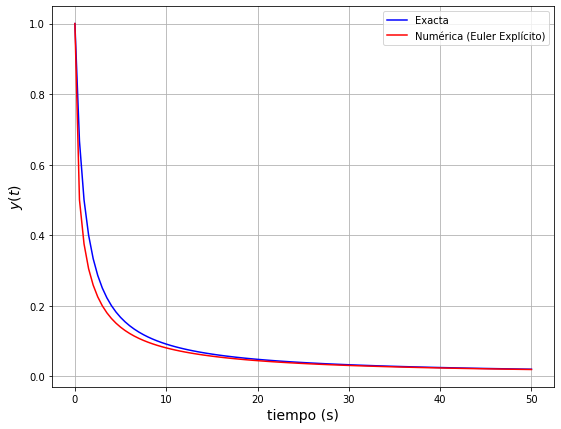

In [ ]:
#Creamos el grafico
alto  = 7
ancho = 9

fig, ax = plt.subplots(figsize=(ancho,alto))

plt.plot(t,yexact,'-b',label='Exacta')
plt.plot(t,y,'-r',label='Numérica (Euler Explícito)')
plt.xlabel('tiempo (s)',fontsize=14)
plt.ylabel('$y(t)$',fontsize=14)
plt.grid()
plt.legend()
plt.show()

Para estudiar el análisis de esquemas de integración temporal, consideremos la ecuación diferencial de prueba (test equation):

$$\displaystyle\frac{d y}{d t}=f(y)=\lambda y$$

Con $\lambda < 0$ un parámetro. La solución exacta de esta ecuación es:

$$y(t)=y_{0} e^{\lambda t}$$


In [ ]:
delta_t = np.arange(0,10+0.1,0.1)
lamb = -1.0

y_adi_exact = np.exp(lamb*delta_t)

y_adi_eulerexplicito = 1 + lamb*delta_t
y_adi_eulerimplicito = (1-lamb*delta_t)**-1
y_adi_crank_nicolson = (1+0.5*lamb*delta_t)*(1-0.5*lamb*delta_t)**-1

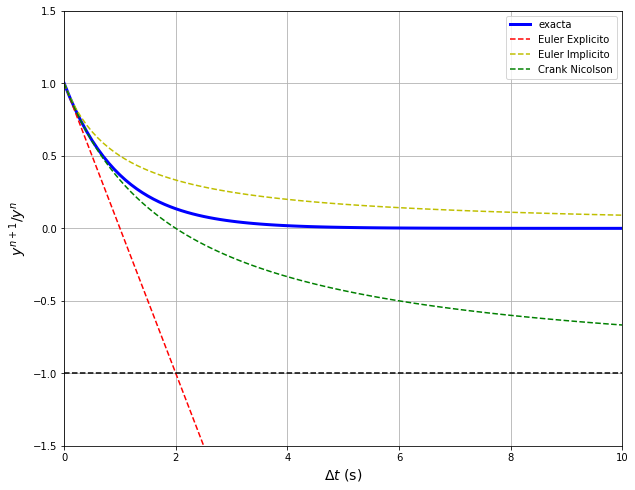

In [ ]:
#Creamos el grafico
alto  = 8
ancho = 10

fig, ax = plt.subplots(figsize=(ancho,alto))

plt.plot(delta_t,y_adi_exact,'-b',linewidth=3,label='exacta')
plt.plot(delta_t,y_adi_eulerexplicito,'--r',label='Euler Explicito')
plt.plot(delta_t,y_adi_eulerimplicito,'--y',label='Euler Implicito')
plt.plot(delta_t,y_adi_crank_nicolson,'--g',label='Crank Nicolson')
plt.xlabel('$\Delta t$ (s)',fontsize=14)
plt.ylabel('$y^{n+1}/y^{n}$',fontsize=14)
plt.axhline(y=-1.0,color='k',linestyle='--')
plt.grid()
plt.xlim(0,10)
plt.ylim(-1.5,1.5)
plt.legend()
plt.show()